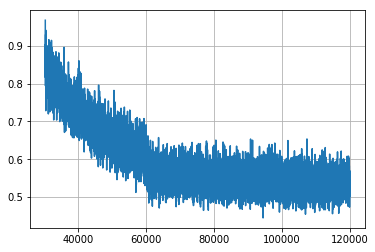

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import re

def parse_log(log_file):
    with open(log_file, 'r') as log_file2:
        log = log_file2.read()

    loss_pattern = r"Iteration (?P<iter_num>\d+), loss = (?P<loss_val>[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
    losses = []
    loss_iterations = []

    fileName = os.path.basename(log_file)
    for r in re.findall(loss_pattern, log):
        loss_iterations.append(int(r[0]))
        losses.append(float(r[1]))

    loss_iterations = np.array(loss_iterations)
    losses = np.array(losses)

    accuracy_pattern = r"Iteration (?P<iter_num>\d+), Testing net \(#0\)\n.* accuracy = (?P<accuracy>[+-]?(\d+(\.\d*)?|\.\d+)([eE][+-]?\d+)?)"
    accuracies = []
    accuracy_iterations = []
    accuracies_iteration_checkpoints_ind = []

    for r in re.findall(accuracy_pattern, log):
        iteration = int(r[0])
        accuracy = float(r[1]) * 100

        if iteration % 10000 == 0 and iteration > 0:
            accuracies_iteration_checkpoints_ind.append(len(accuracy_iterations))

        accuracy_iterations.append(iteration)
        accuracies.append(accuracy)

    accuracy_iterations = np.array(accuracy_iterations)
    accuracies = np.array(accuracies)
    
    result = {
        'loss_iterations': loss_iterations,
        'losses': losses,
        'accuracy_iterations': accuracy_iterations,
        'accuracies': accuracies,
        'accuracies_iteration_checkpoints_ind': accuracies_iteration_checkpoints_ind,
        'fileName': fileName
    }
    
    return result

data = parse_log('/home/mmh-mv/caffe_forks/VGG_text_longer_conv_300x300.log')

#plt.plot(data['loss_iterations'][:2000], data['losses'][:2000])
plt.plot(data['loss_iterations'], data['losses'])
plt.grid()

plt.show()